In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('processed data/fe_missForest_data.csv')

In [4]:
X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

losses = []
min_loss = float('inf')
min_k = 0

for i in range(1, 51):
    pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsRegressor(n_neighbors=i))])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    loss = np.mean((y_pred - y_test)**2)
    if loss < min_loss:
        min_loss = loss
        min_k = i
    losses.append(loss)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 51), losses)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean squared error')
plt.show()

ValueError: could not convert string to float: 'France'

In [7]:
print('Best k:', min_k)
print('Minimum loss:', min_loss)

Best k: 10
Minimum loss: 4.82893364532843


In [8]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=min_k))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Training Set:')
print('MAE:', mean_absolute_error(y_train, y_train_pred))
print('MSE:', mean_squared_error(y_train, y_train_pred))
print('R2 score:', r2_score(y_train, y_train_pred))

print()

print('Test Set:')
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Training Set:
MAE: 1.5328736208625877
MSE: 3.820432129722501
R2 score: 0.9212846420041625

Test Set:
MAE: 1.7244024736754138
MSE: 4.82893364532843
R2 score: 0.8991225801786616


In [10]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X, y, cv=10, scoring='neg_mean_absolute_error')
print('Cross-validation mean absolute error:', -scores.mean())

Cross-validation mean absolute error: 2.0726302034326745


In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Định nghĩa số lượng folds cho cross-validation
cv = 10

# Sử dụng cross_val_score để tính toán R^2 score
r2_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2', n_jobs=-1)
print(f"R^2 scores cho {cv}-fold cross-validation: {r2_scores}")
print(f"R^2 trung bình: {r2_scores.mean():.3f} ± {r2_scores.std():.3f}")
print()

# Sử dụng cross_val_score để tính toán MSE (sử dụng scoring 'neg_mean_squared_error')
mse_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
# Chuyển đổi MSE về giá trị dương
mse_scores = -mse_scores
print(f"MSE cho {cv}-fold cross-validation: {mse_scores}")
print(f"MSE trung bình: {mse_scores.mean():.3f}" + u"\u00B1" + f" {mse_scores.std():.3f}")
print()

# Đánh giá Mean Absolute Error (MAE)
mae_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=-1)
mae_scores = -mae_scores
print(f"MAE cho {cv}-fold cross-validation: {mae_scores}")
print(f"MAE trung bình: {mae_scores.mean():.3f} ± {mae_scores.std():.3f}")

R^2 scores cho 10-fold cross-validation: [ 0.65160199 -0.03351709  0.04809751 -1.70226055 -4.73875586 -6.90708052
 -5.82949607 -6.69995563 -6.24897201  0.35423423]
R^2 trung bình: -3.111 ± 3.079

MSE cho 10-fold cross-validation: [ 5.54197772  3.49846797 16.61081894  9.09227298  5.62777716  4.0524234
  3.25835655  4.82045708  7.66173356  7.59993868]
MSE trung bình: 6.776± 3.752

MAE cho 10-fold cross-validation: [1.93286908 1.43671309 3.38362117 2.49097493 1.93058496 1.61816156
 1.42122563 1.75919732 2.38467113 2.36828317]
MAE trung bình: 2.073 ± 0.570


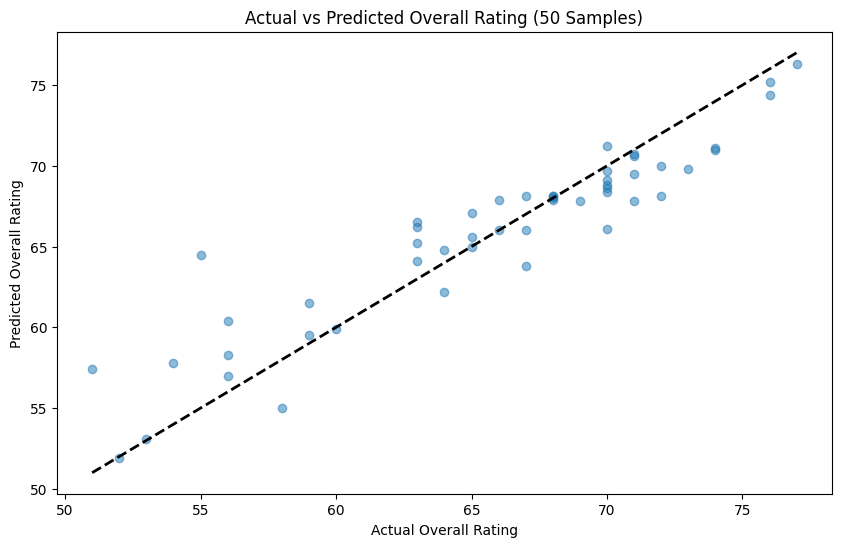

In [12]:
import matplotlib.pyplot as plt

# Select 20 samples
y_test_sample = y_test[:50]
y_pred_sample = y_pred[:50]

plt.figure(figsize=(10, 6))
plt.scatter(y_test_sample, y_pred_sample, alpha=0.5)
plt.plot([y_test_sample.min(), y_test_sample.max()], [y_test_sample.min(), y_test_sample.max()], 'k--', lw=2)
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.title('Actual vs Predicted Overall Rating (50 Samples)')
plt.show()